In [1]:
#from sklearn.neighbors import LocalOutlierFactor
#from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 300)
import seaborn as sns

In [5]:
#original = pd.read_csv('../Data/Original.csv')

original = pd.read_csv('../Data/Ames_HousePrice.csv')
ordinal = pd.read_csv('../Data/BaseOrdinal.csv')

In [6]:
original.shape

(2580, 82)

In [7]:
ordinal.shape

(2580, 81)

In [8]:
ordinal_fit = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal_fit.shape

(2580, 80)

In [9]:
ordinal_fit.head(3)

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,GarageType,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,MoSold,YrSold,GrLivArea,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,3,3,3,3,3,3,8,4,1,3,3,0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,1.0,3.0,5.0,6.0,1.0,1.0,3.0,5.0,2.0,4.0,1.0,9.0,4.0,6.0,5.0,4.0,856,126000,7890,6,6,1939,1950,856,0,0,1,0,2,1,4,1,0,0,0,0,166,0,0,68.516053,0.0,238.0,0.0,618.0,856.0,1.0,0.0,1939.0,2.0,399.0
1,4,3,4,3,3,4,8,0,3,3,3,0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,3.0,1.0,2.0,4.0,1.0,9.0,4.0,0.0,4.0,3.0,1049,139500,4235,5,5,1984,1984,1049,0,0,2,0,2,1,5,0,0,105,0,0,0,0,0,42.000000,149.0,552.0,393.0,104.0,1049.0,1.0,0.0,1984.0,1.0,266.0
2,4,3,3,3,5,4,8,0,1,3,1,0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,0.0,3.0,0.0,6.0,1.0,1.0,3.0,5.0,0.0,4.0,1.0,9.0,4.0,6.0,2.0,1.0,1001,124900,6060,5,9,1930,2007,1001,0,0,1,0,2,1,5,0,154,0,42,86,0,0,0,60.000000,0.0,737.0,0.0,100.0,837.0,0.0,0.0,1930.0,1.0,216.0


In [10]:
X = ordinal_fit.values
#y = ordinal.SalePrice.values

In [11]:
results = []

for i in range(100):
    iso = IsolationForest(n_estimators=1000, max_samples=750, contamination=0.01).fit(X)
    pred = pd.Series(iso.predict(X))
    #result = pd.concat([pred], axis=1)
    results.append(pred)

In [12]:
#results

In [13]:
combined_results = pd.concat(results, axis=1)
combined_results

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2576,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2577,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2578,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [14]:
combined_results['Sum'] = combined_results.sum(axis=1)

In [15]:
new = ordinal.join(combined_results)

In [16]:
new.sort_values(by='Sum').head(30)

,Unnamed: 0,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,GarageType,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,MoSold,YrSold,GrLivArea,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,Sum
2323,2323,2,2,0,0,3,3,7,0,1,3,3,0,3.0,0.0,1.0,3.0,3.0,1.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,1.0,4.0,4.0,4.0,1.0,0.0,0.0,5.0,0.0,4.0,1.0,3.0,4.0,6.0,5.0,3.0,810,57625,21780,2,4,1910,1950,810,0,0,1,0,1,1,4,0,119,24,0,0,0,0,0,109.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1975.000000,1.0,280.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-100
2204,2204,3,3,0,0,3,3,6,0,0,0,0,0,4.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,2.0,5.0,0.0,4.0,9.0,4.0,2.0,3.0,4.0,4.0,4.0,1.0,1.0,3.0,6.0,2.0,4.0,3.0,9.0,4.0,15.0,4.0,4.0,2650,160000,7200,4,6,1967,1967,862,1788,0,3,0,6,2,10,0,0,0,0,0,0,0,500,60.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1976.982048,0.0,0.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-100
50,50,3,3,3,3,2,3,6,0,0,0,0,0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,2.0,5.0,3.0,0.0,13.0,9.0,2.0,2.0,2.0,5.0,6.0,3.0,0.0,0.0,6.0,2.0,4.0,3.0,9.0,1.0,15.0,0.0,1.0,2592,150000,10890,5,6,1923,1950,1296,1296,0,2,0,6,2,12,0,0,742,240,0,0,0,1512,60.000000,0.0,371.0,0.0,925.0,1296.0,2.0,0.0,1976.982048,0.0,0.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-100
1233,1233,2,2,2,1,4,2,4,0,0,0,0,0,5.0,1.0,1.0,0.0,2.0,0.0,4.0,2.0,7.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,0.0,1.0,1.0,6.0,1.0,0.0,0.0,6.0,2.0,4.0,1.0,9.0,4.0,6.0,5.0,3.0,904,61000,10020,1,1,1922,1950,904,0,0,0,1,1,1,4,0,0,0,0,0,0,0,0,68.516053,0.0,350.0,0.0,333.0,683.0,1.0,0.0,1976.982048,0.0,0.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-100
2513,2513,3,3,3,3,3,5,4,4,0,0,0,0,5.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,4.0,2.0,2.0,0.0,0.0,1.0,0.0,8.0,8.0,2.0,1.0,3.0,5.0,1.0,1.0,1.0,3.0,6.0,2.0,2.0,1.0,9.0,4.0,9.0,5.0,1.0,3086,200500,18030,5,6,1946,1994,1636,971,479,3,0,3,1,12,1,122,0,0,0,0,0,0,138.000000,0.0,152.0,469.0,977.0,1598.0,0.0,0.0,1976.982048,0.0,0.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,

In [17]:
chosen = new[new.Sum==-100]
chosen.shape

(16, 182)

In [18]:
iso2 = IsolationForest(n_estimators=1000, max_samples=750, contamination=0.001).fit(X)

In [19]:
pred = iso2.predict(X)

In [20]:
outs = ordinal[pred==-1]

In [21]:
outs.shape

(3, 81)

In [22]:
idx1 = chosen.index
idx1

Int64Index([  50,  309,  336,  487,  802,  917, 1007, 1233, 2004, 2008, 2204,
            2273, 2323, 2425, 2436, 2513],
           dtype='int64')

In [23]:
idx2 = outs.index
idx2

Int64Index([50, 309, 2004], dtype='int64')

In [24]:
#Any special outliers in the for loop? Should be None. 
idx1.difference(idx2)

Int64Index([336, 487, 802, 917, 1007, 1233, 2008, 2204, 2273, 2323, 2425, 2436,
            2513],
           dtype='int64')

In [25]:
#Any special outliers in the one-off fit? Should be few....
idx2.difference(idx1)

Int64Index([], dtype='int64')

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()

In [27]:
X_scaled = scaler.fit_transform(X)

In [28]:
X_reduce = pca.fit_transform(X_scaled)

In [29]:
X_reduce

array([[-2.75590421, -1.06613252,  0.81133143],
       [-0.50064336, -4.34387021, -0.70200063],
       [-3.3400872 , -1.52698521, -0.53458854],
       ...,
       [-1.79199964,  3.81325868,  0.74685441],
       [ 3.38702417,  0.7143243 , -1.33001164],
       [ 3.2969013 ,  1.85745811, -1.40709532]])

In [30]:
outlier_index = list(outs.index)
outlier_index

[50, 309, 2004]

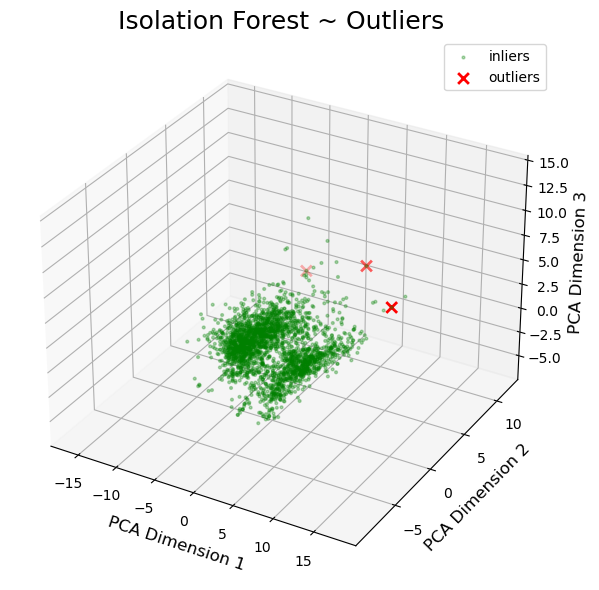

In [31]:
plt.style.use('default')
#plt.style.use('ggplot')

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
#ax.set_zlabel("x_composite_3")




#plt.figure(figsize=(8,4))
#sns.boxplot(data=combo[['SLR MAE Area', 'SLR MAE Qual']], showmeans=True,
#                        meanprops={"marker":"o",
#                       "markerfacecolor":"white", 
#                       "markeredgecolor":"black",
#                      "markersize":"8"}, palette='coolwarm')
#plt.xticks(rotation=25)
#plt.ylabel('Mean Absolute Error (US$)', fontsize=14)
#plt.xlabel('Model', fontsize=14)
#plt.title('K-Fold CV MAE Comparison By Model', fontsize=18, color='blue')

#plt.tight_layout();



# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, 
           label="inliers",c="green", alpha=0.3)

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.title("Isolation Forest ~ Outliers", fontsize=18, color='black')
ax.set_xlabel('PCA Dimension 1', fontsize=12)
ax.set_ylabel('PCA Dimension 2', fontsize=12)
ax.set_zlabel('PCA Dimension 3', fontsize=12)
plt.margins(x=0.3, y=0.3)
plt.tight_layout()
plt.show();

In [32]:
outlier_index = [309, 1007]
outlier_index

[309, 1007]

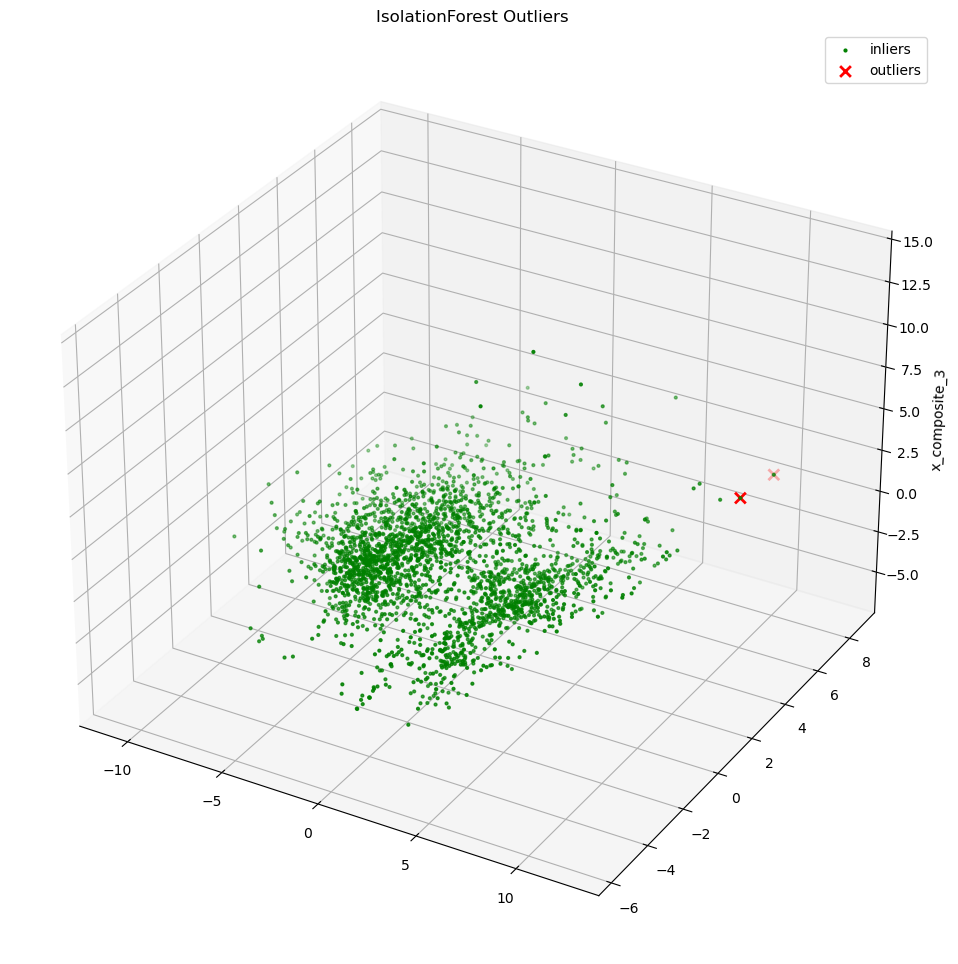

In [33]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.title("IsolationForest Outliers")
plt.show()

In [34]:
outlier_index = list(chosen.index)
outlier_index

[50,
 309,
 336,
 487,
 802,
 917,
 1007,
 1233,
 2004,
 2008,
 2204,
 2273,
 2323,
 2425,
 2436,
 2513]

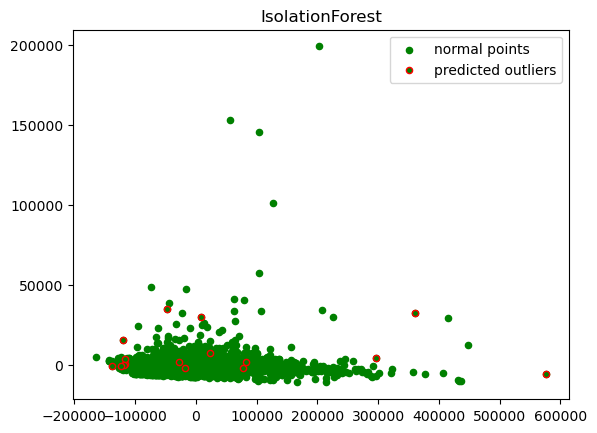

In [35]:
pca2 = PCA(2)
pca2.fit(X)

res=pd.DataFrame(pca2.transform(X))
Z = np.array(res)

plt.title("IsolationForest")
plt.contourf(Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

In [36]:
outlier_index = [309, 1007]
outlier_index

[309, 1007]

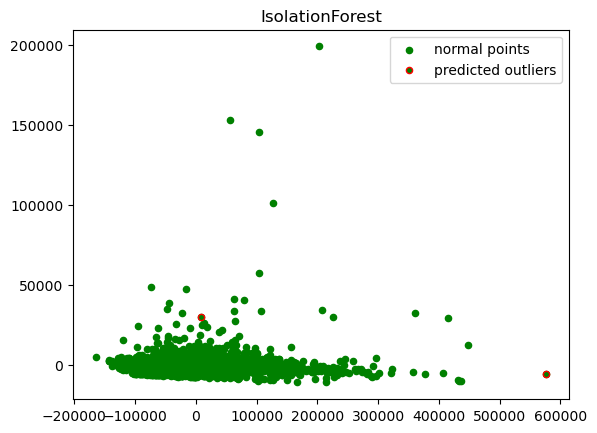

In [37]:
pca2 = PCA(2)
pca2.fit(X)

res=pd.DataFrame(pca2.transform(X))
Z = np.array(res)

plt.title("IsolationForest")
plt.contourf(Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

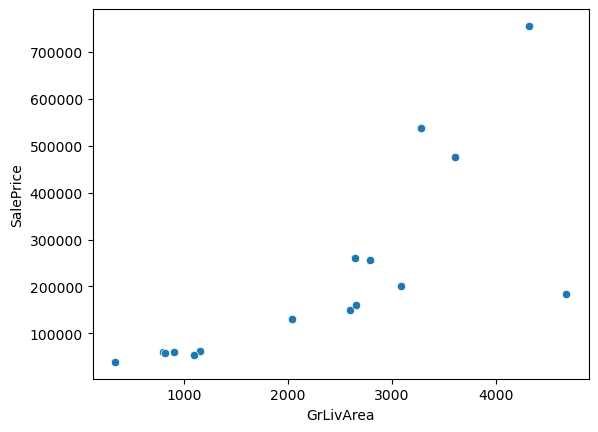

In [38]:
sns.scatterplot(data=chosen, x='GrLivArea', y='SalePrice');

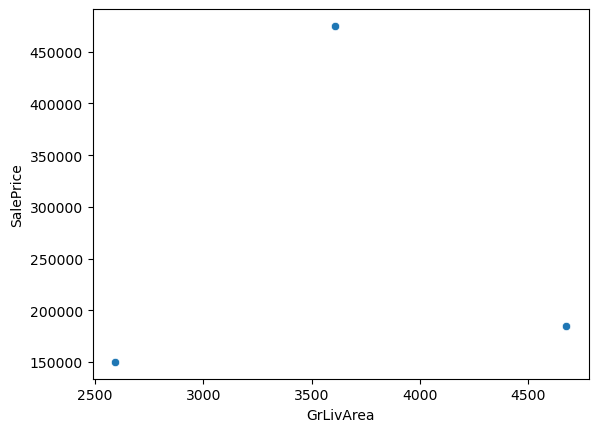

In [39]:
sns.scatterplot(data=outs, x='GrLivArea', y='SalePrice');

In [40]:
chosen

,Unnamed: 0,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,GarageType,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,MoSold,YrSold,GrLivArea,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,Sum
50,50,3,3,3,3,2,3,6,0,0,0,0,0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,2.0,5.0,3.0,0.0,13.0,9.0,2.0,2.0,2.0,5.0,6.0,3.0,0.0,0.0,6.0,2.0,4.0,3.0,9.0,1.0,15.0,0.0,1.0,2592,150000,10890,5,6,1923,1950,1296,1296,0,2,0,6,2,12,0,0,742,240,0,0,0,1512,60.000000,0.0,371.0,0.0,925.0,1296.0,2.0,0.0,1976.982048,0.0,0.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-100
309,309,5,3,5,3,5,5,8,4,3,3,3,0,5.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,7.0,4.0,4.0,0.0,5.0,3.0,0.0,5.0,5.0,3.0,2.0,1.0,2.0,6.0,1.0,1.0,3.0,3.0,2.0,4.0,1.0,6.0,5.0,10.0,1.0,1.0,4676,184750,40094,10,5,2007,2008,3138,1538,0,3,1,3,1,11,1,208,406,0,0,0,0,0,130.000000,762.0,2260.0,0.0,878.0,3138.0,1.0,0.0,2007.000000,3.0,884.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-100
336,336,3,3,0,0,3,2,8,0,0,0,0,0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,7.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,9.0,0.0,2.0,4.0,4.0,4.0,1.0,0.0,3.0,6.0,0.0,4.0,1.0,9.0,4.0,15.0,11.0,1.0,1152,61500,6882,4,3,1955,1955,1152,0,0,2,0,2,2,6,0,0,0,0,0,0,0,0,74.000000,128.0,0.0,0.0,0.0,0.0,0.0,0.0,1976.982048,0.0,0.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-100
487,487,4,2,4,3,4,4,5,3,2,3,3,4,5.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,27.0,2.0,2.0,0.0,7.0,1.0,0.0,14.0,14.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,3.0,1.0,2.0,0.0,1.0,9.0,4.0,13.0,0.0,0.0,2646,260000,14330,7,4,1974,1974,2151,495,0,2,0,3,1,9,4,641,100,0,0,0,800,0,100.000000,145.0,1023.0,497.0,228.0,1748.0,1.0,2.0,1974.000000,2.0,550.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-100
802,802,5,3,4,3,5,5,5,4,3,3,3,0,5.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,25.0,2.0,2.0,0.0,5.0,3.0,0.0,5.0,15.0,1.0,2.0,1.0,0.0,6.0,1.0,1.0,3.0,3.0,2.0,4.0,1.0,9.0,4.0,10.0,8.0,4.0,3279,538000,53504,8,5,2003,2003,1690,1589,0,3,1,4,1,12,1,503,36,0,0,210,0,0,47.000000,603.0,1416.0,0.0,234.0,1650.0,1.0,0.0,2003.000000,3.0,841.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1

In [ ]:
#base = pd.read_csv('../../Data/BaseData.csv')
#base

In [ ]:
#base_dropIF = base.drop(chosen.index)

In [ ]:
#base_dropIF.shape

In [ ]:
#ordinal_dropIF = ordinal.drop(chosen.index)

In [ ]:
#ordinal_dropIF.shape

In [ ]:
#chosen.to_csv('IF_Outliers.csv')

In [ ]:
#base_dropIF.to_csv('BaseDropIF.csv', index=False)

In [ ]:
#ordinal_dropIF.to_csv('OrdinalDropIF.csv', index=False)